<a href="https://colab.research.google.com/github/Keerthishankar-Punchithaya/Job-Analytics/blob/main/FT_DA_101_Project_1A_Job_Analytics_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Job Analytics***

---



# **Web Scraping**

---



---



In [ ]:
# install selenium and pandas
!pip install selenium
!pip install pandas

Web scrapping and storing scrapped data in .csv

In [ ]:
import requests
from bs4 import BeautifulSoup
import requests
# import gspread
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
# from gspread_dataframe import set_with_dataframe
import requests
import selenium.webdriver as webdriver
import time
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.firefox.options import Options


firefox_binary_path = r"C:\Program Files\Mozilla Firefox\firefox.exe"

# Create an instance of the Firefox Options class
options = Options()

# Set the binary location in the options
options.binary_location = firefox_binary_path

driver = webdriver.Firefox(options=options)

url="https://www.instahyre.com/python-jobs"
page=requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')


driver.get(url)



jobs_list=[]
# Scroll down to load more jobs (you may need to adjust the loop and sleep time based on your needs)
for _ in range(21):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    openings = soup.find_all('div',{'class':'employer-row'})
    # print(openings)
    for opening in openings:
        jobtitle=opening.find('div',{'class':'company-name ng-binding'}).text
        # print(jobtitle)
        location=opening.find('div',{'class':'employer-locations'}).text.strip()
        founded=opening.find('span',{'ng-if':'opp.employer.company_founded'}).text.strip()
        employee_count=opening.find('span',{'ng-if':'opp.employer.employee_count'}).text.strip()
        about=opening.find('div',{'class':'employer-notes ng-binding ng-scope'})
        if about:
            description=about.text.strip()
        else:
            description='N/A'
        skills_ul=opening.find('ul',{'class':'tags candidate-opp-keywords'})
        skills_li=skills_ul.find_all('li',{'class':'ng-binding ng-scope'})
        skills=','.join(li.text for li in skills_li)
        # print(skills)
        link=opening.find('a',{'id':'employer-profile-opportunity'}).get('href')
        # link=link_tag.get('href')
        data= {
            'Job Title' : jobtitle,
            'Location' : location,
            'Company founded' : founded,
            'Employee Count' : employee_count,
            'Description' : description,
            'Skills' : skills,
            'Link' : link
        }
        jobs_list.append(data)

    # next page button click
    next_page_button = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, '[ng-class="{\'hidden\': currentPage === pages[pages.length - 1]}"]'))
    )


    # Scroll to the element to make sure it's clickable
    driver.execute_script("arguments[0].scrollIntoView(true);", next_page_button)

    # Click the "Next Page" button
    next_page_button.click()

df=pd.DataFrame(jobs_list)
# print(df)
df.to_csv('Instahyre_scrapping.csv',index=False)
time.sleep(5)
driver.quit()

# **Data Cleaning**

---



---



In [1]:
# install csv and pandas

!pip install csv
!pip install pandas


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


Read Dataset:

In [27]:
import csv
import pandas as pd
# df=pd.read_csv("Instahyre_scrapping.csv")
df=pd.read_csv(r'https://raw.githubusercontent.com/Keerthishankar-Punchithaya/Job-Analytics/main/Instahyre_scrapping.csv')
print(df.head())

                                           Job Title  \
0                                Adobe - AI Engineer   
1             Allen Career Institute - Data Engineer   
2                   AmberStudent - Software Engineer   
3  Bristol Myers Squibb - Cloud Computing Develop...   
4    Bristol Myers Squibb - Cloud Computing Engineer   

                     Location  Company founded            Employee Count  \
0  Job available in Bangalore  Founded in 1982  More than 1000 employees   
1  Job available in Bangalore  Founded in 1988  More than 1000 employees   
2      Job available in Noida  Founded in 2016        50 - 200 employees   
3  Job available in Hyderabad  Founded in 1887  More than 1000 employees   
4  Job available in Hyderabad  Founded in 1887  More than 1000 employees   

                                         Description  \
0  Founded in 1982 and headquartered in San Jose,...   
1  Allen is a career coaching institute that offe...   
2  AmberStudent is a one-click platfor

**1. Handling Null Values**

---


null value count per column

In [28]:
df.isnull().sum()

Job Title          0
Location           0
Company founded    0
Employee Count     2
Description        9
Skills             3
Link               0
dtype: int64

In [29]:
# remove null values
df=df.fillna('Not Found')
df.isnull().sum()

Job Title          0
Location           0
Company founded    0
Employee Count     0
Description        0
Skills             0
Link               0
dtype: int64

In [ ]:
# null value check
df.isnull()

,name,location,founded,employees,about,skills,link
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
65,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False
67,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False


inserting each null values (optional)

In [ ]:
# inserting values into the null values
import pandas as pd
import numpy as np

# Check for null values
for col in df.columns:
    null_rows = df[df[col].isnull()].index.tolist()
    if null_rows:
        print(f"Null values in column '{col}' are at rows: {null_rows}")
        print(f"column: {col}, rows: {df.loc[null_rows]['name']}")
        print("---------------------------------------------------------------")
        for i in range(len(null_rows)):
          print(f"-> Enter value to insert for\n company: '{df.loc[null_rows[i],'name']}'\n column: '{col}' ")
          insert_value = input("Insert Value: ")
        for row in null_rows:
            df.at[row, col] = insert_value
        print("---------------------------------------------------------------")
        print("Empty value filled!")

if df.isnull().sum().sum() == 0:
    print("No empty value!")
else:
    print("There are still empty values.")

# update changes on csv
df.to_csv('Job_Analytics.csv',index=False)
print("'Job_Analytics.csv'  updated!")

Null values in column 'Employee Count' are at rows: [92, 354]


KeyError: ignored

**2. Duplicate Values Removal**

---



In [25]:
import pandas as pd
import numpy as np

initial_length=len(df)

# delete duplicate rows
df.drop_duplicates(subset=['name'],inplace=True)
final_length = len(df)
print(f"Number of duplicate rows removed: {initial_length - final_length}")

if df.isnull().sum().sum() == 0:
    print("No empty value!")
else:
    print("There are still empty values.")
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")

KeyError: ignored

**3. Data Type Standardisation**

---



Check datatype for each column

In [15]:
# check datatypes for each column
print(df.dtypes)

Job Title          object
Location           object
Company founded    object
Employee Count     object
Description        object
Skills             object
Link               object
dtype: object


# **Data Visualisation**

---



---



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Exploratory Data Analysis (EDA)**

---


Describe data:

In [16]:
df.describe()

,Job Title,Location,Company founded,Employee Count,Description,Skills,Link
count,420,420,420,420,420,420,420
unique,393,31,51,7,275,355,420
top,Tech Mahindra - DevOps Engineer,Job available in Bangalore,Founded in 2021,More than 1000 employees,"Tech Mahindra is an MNC provider of IT, networ...","Django,Flask",https://www.instahyre.com/job-295410-ai-engine...
freq,3,208,32,122,14,11,1


check for null for columns:

In [17]:
df.isnull().sum()

Job Title          0
Location           0
Company founded    0
Employee Count     0
Description        0
Skills             0
Link               0
dtype: int64

**2. Correlation Analysis**

---



**3. Pattern Recognition**

---



Distribution of jobs by location

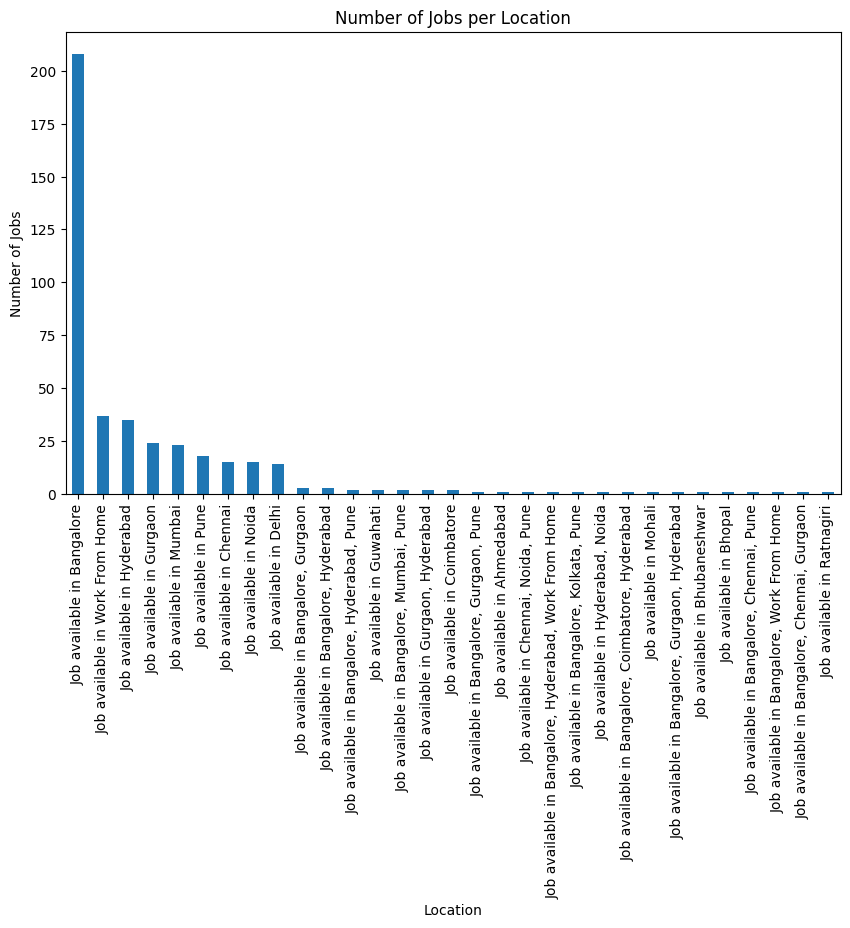

In [22]:
# Count of jobs per location
location_counts = df['Location'].value_counts()
location_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Jobs per Location')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.show()

**4. Skill and Technology Trends Visualization**

---



Highest needed skills based on count

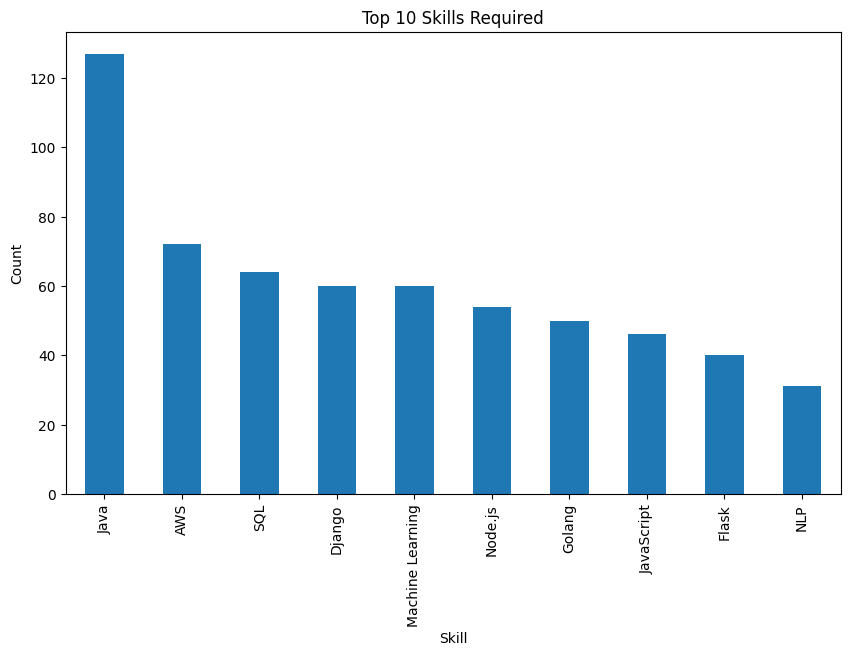

In [24]:
# Explore skills column
# Assuming skills are comma-separated in the Skills column
skills = df['Skills'].str.split(',').explode().str.strip()
skills_counts = skills.value_counts().head(10)
skills_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Skills Required')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.show()

**5. Geographical Analysis Representation**

---



Location Visualization (univariate analysis):

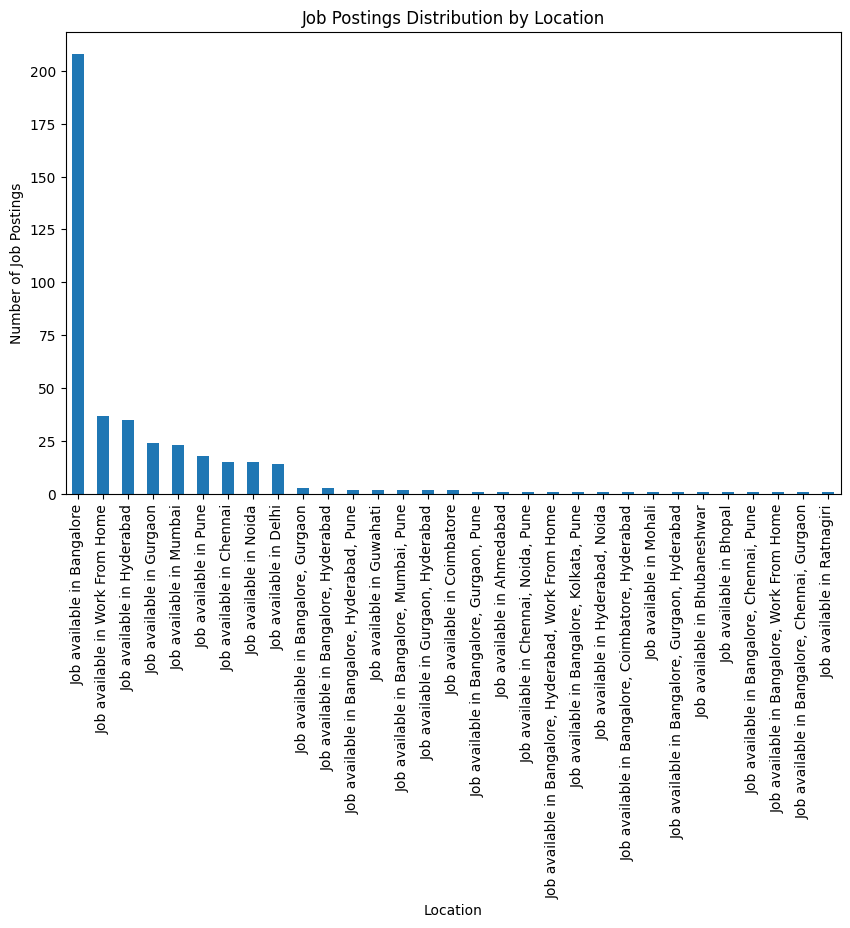

In [21]:
plt.figure(figsize=(10, 6))
df["Location"].value_counts().plot(kind="bar")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.title("Job Postings Distribution by Location")
plt.show()


**6. Bonus**

---



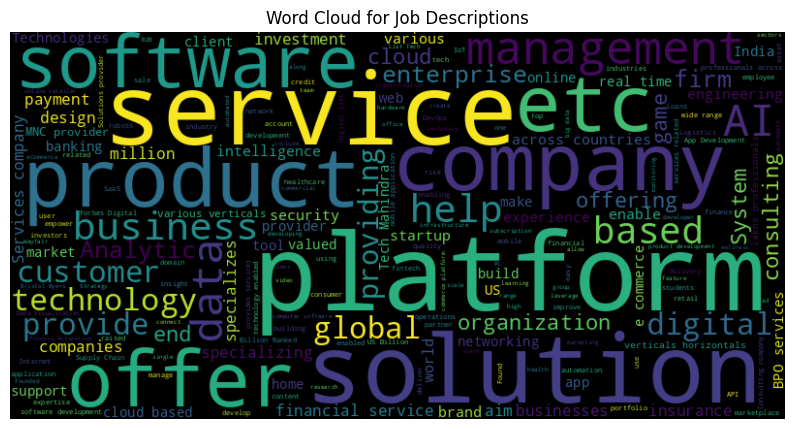

In [23]:
# Word cloud for job descriptions
from wordcloud import WordCloud

text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Job Descriptions')
plt.show()